In [19]:
import http.client
import requests
import datetime
import pandas as pd

In [20]:

lat=51.2299
lon=0.1463
with open('weathermap.appid') as f: appid=f.read()


#conn = http.client.HTTPSConnection('api.openweathermap.org')
#conn.request('GET','/data/2.5/onecall?lat=51.229905109357674&lon=0.14630698299785136&exclude=&appid=dc4a54b25142078f4162bca7cc89f16e&#units=metric')
#res = conn.getresponse()

#data = res.read()
#print(res.status, res.reason)
#print(data.decode('utf-8'))
#print(res.getheaders())


reqmap = {
    'lat' : lat,
    'lon' : lon,
    'appid' : appid,
    'units' : 'metric'
}


url = 'https://api.openweathermap.org/data/2.5/onecall'
response = requests.get(url, reqmap)

print(response.status_code)
print(response.headers)
print(response.text[:100])


200
{'Server': 'openresty', 'Date': 'Thu, 25 Mar 2021 15:56:49 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Content-Length': '19357', 'Connection': 'keep-alive', 'X-Cache-Key': '/data/2.5/onecall?lat=51.23&lon=0.15&units=metric', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Methods': 'GET, POST'}
{"lat":51.2299,"lon":0.1463,"timezone":"Europ


In [21]:
jsonResponse = response.json()
#print("Print each key-value pair from JSON response")
#for key, value in jsonResponse.items():
#    print(key, ":", value)

In [22]:
daily=pd.json_normalize(jsonResponse["daily"])
daily.index = daily.dt.apply(datetime.datetime.utcfromtimestamp)

In [23]:
daily

,dt,sunrise,sunset,pressure,humidity,dew_point,wind_speed,wind_deg,weather,clouds,...,temp.day,temp.min,temp.max,temp.night,temp.eve,temp.morn,feels_like.day,feels_like.night,feels_like.eve,feels_like.morn
dt,,,,,,,,,,,,,,,,,,,,,
2021-03-25 12:00:00,1616673600,1616651432,1616696401,1019,70,6.21,6.98,224,"[{'id': 500, 'main': 'Rain', 'description': 'l...",33,...,11.52,2.89,11.55,8.67,8.39,2.89,5.77,3.06,2.71,-0.66
2021-03-26 12:00:00,1616760000,1616737695,1616782900,1010,90,7.09,9.98,204,"[{'id': 500, 'main': 'Rain', 'description': 'l...",100,...,8.70,2.73,8.87,2.73,5.26,7.79,1.05,-3.87,-0.20,1.33
2021-03-27 12:00:00,1616846400,1616823958,1616869399,1022,50,-1.26,8.05,272,"[{'id': 803, 'main': 'Clouds', 'description': ...",52,...,8.56,1.41,9.06,7.77,7.19,1.41,0.76,1.02,1.45,-5.21
2021-03-28 12:00:00,1616932800,1616910222,1616955898,1022,85,7.59,9.78,223,"[{'id': 804, 'main': 'Clouds', 'description': ...",100,...,9.95,7.32,9.95,9.58,9.81,8.09,2.53,2.27,2.59,0.09
2021-03-29 12:00:00,1617019200,1616996485,1617042396,1023,85,10.34,9.09,228,"[{'id': 804, 'main': 'Clouds', 'description': ...",100,...,12.75,8.92,13.31,9.40,11.17,9.54,6.51,4.71,5.25,3.12
2021-03-30 12:00:00,1617105600,1617082749,1617128895,1023,71,10.70,7.74,232,"[{'id': 803, 'main': 'Clouds', 'description': ...",58,...,15.88,7.90,15.88,7.90,11.31,9.54,10.68,5.28,7.74,4.77
2021-03-31 12:00:00,1617192000,1617169013,1617215394,1017,88,7.61,7.38,56,"[{'id': 501, 'main': 'Rain', 'description': 'm...",100,...,9.52,6.42,9.57,6.42,6.68,8.73,3.80,-1.21,-0.95,6.37
2021-04-01 12:00:00,1617278400,1617255278,1617301892,1023,73,6.04,8.45,60,"[{'id': 803, 'main': 'Clouds', 'description': ...",52,...,10.65,5.27,10.65,5.27,6.48,5.67,3.82,0.45,0.82,-0.84


<AxesSubplot:xlabel='dt'>

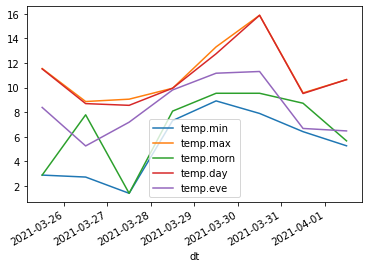

In [26]:
daily[["temp.min", "temp.max", "temp.morn", "temp.day", "temp.eve"]].plot()

In [25]:
daily.columns

Index(['dt', 'sunrise', 'sunset', 'pressure', 'humidity', 'dew_point',
       'wind_speed', 'wind_deg', 'weather', 'clouds', 'pop', 'rain', 'uvi',
       'temp.day', 'temp.min', 'temp.max', 'temp.night', 'temp.eve',
       'temp.morn', 'feels_like.day', 'feels_like.night', 'feels_like.eve',
       'feels_like.morn'],
      dtype='object')